In [324]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

# **<p style="color:Orange;">Project:</p>**

# **<p style="color:#3498db;">🧠 Personality Predciction Using Machine Learning**

In [325]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\personality_dataset.csv")

In [326]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


## Data Info

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [328]:
df.shape

(2900, 8)

## Data Handling And Cleaning

In [329]:
df.isna().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [330]:
df.dropna(subset=["Stage_fear","Drained_after_socializing"],inplace=True)

In [331]:
df["Stage_fear"].mode()

0    No
Name: Stage_fear, dtype: object

In [332]:
df.fillna(df.mean(numeric_only=True),inplace=True)

## EDA & Visualization

### `Correlation Heatmap`

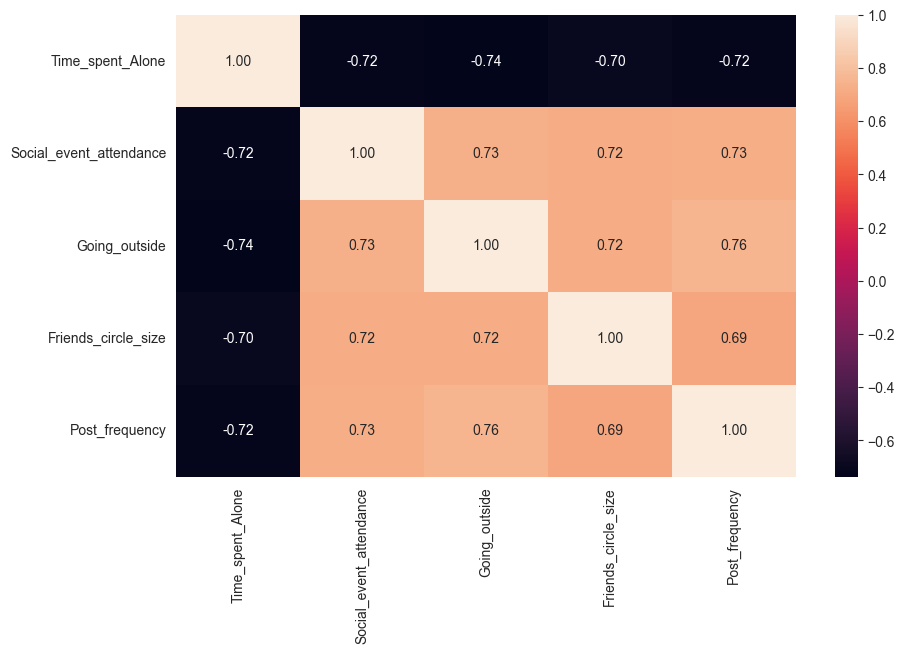

In [333]:
xdf=df.select_dtypes(include="number")
dfx=xdf.corr()
plt.figure(figsize=(10,6))
sns.heatmap(data=dfx,annot=True,fmt=".2f")
plt.show()


### `Histogram Distribution`

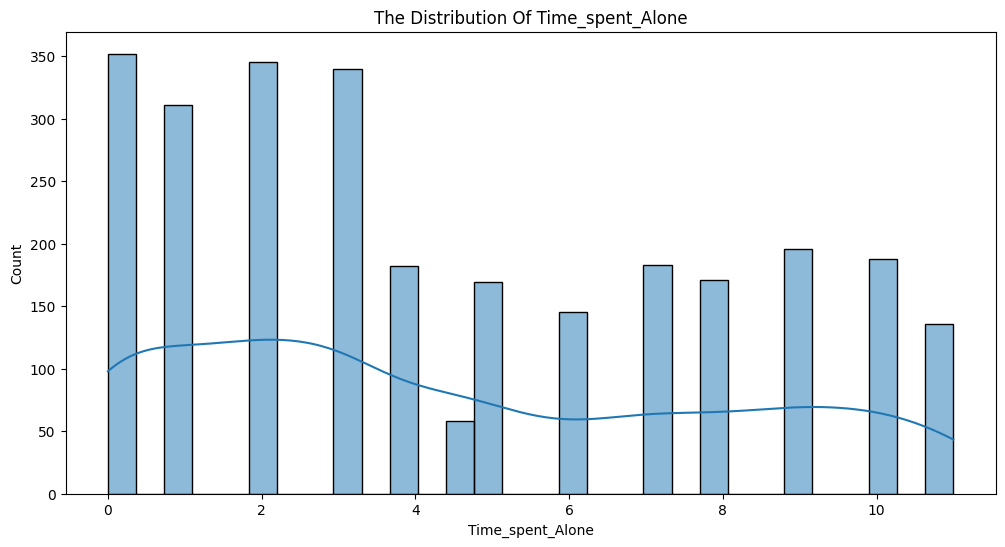

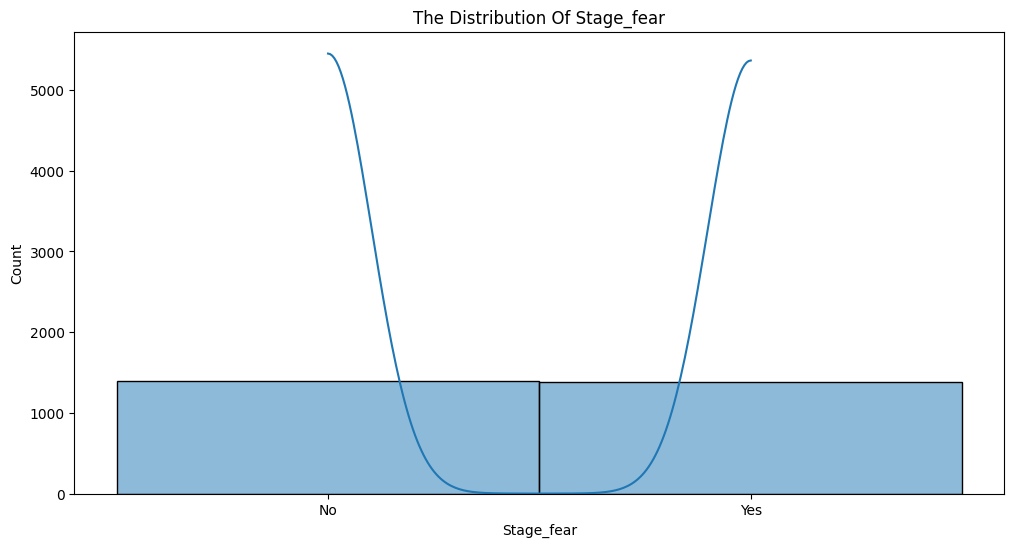

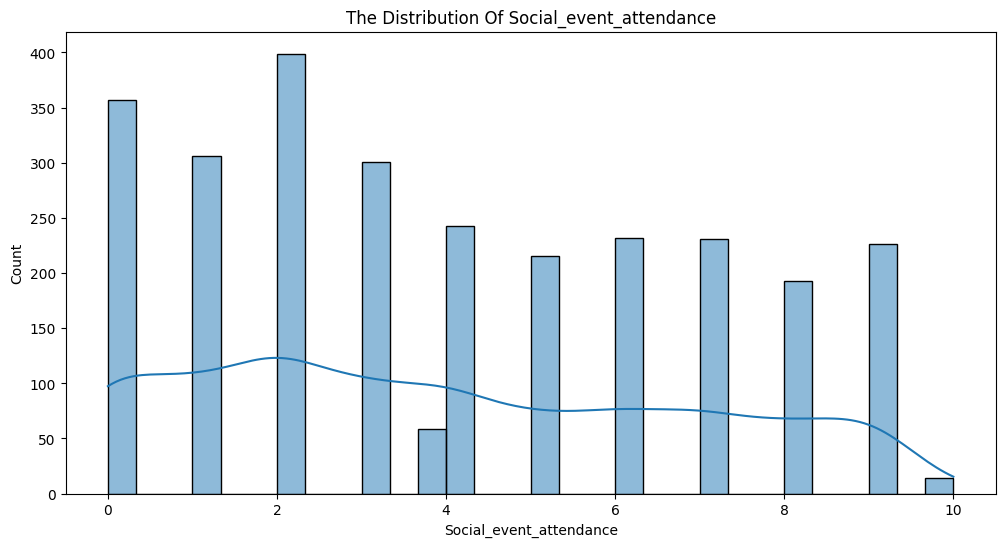

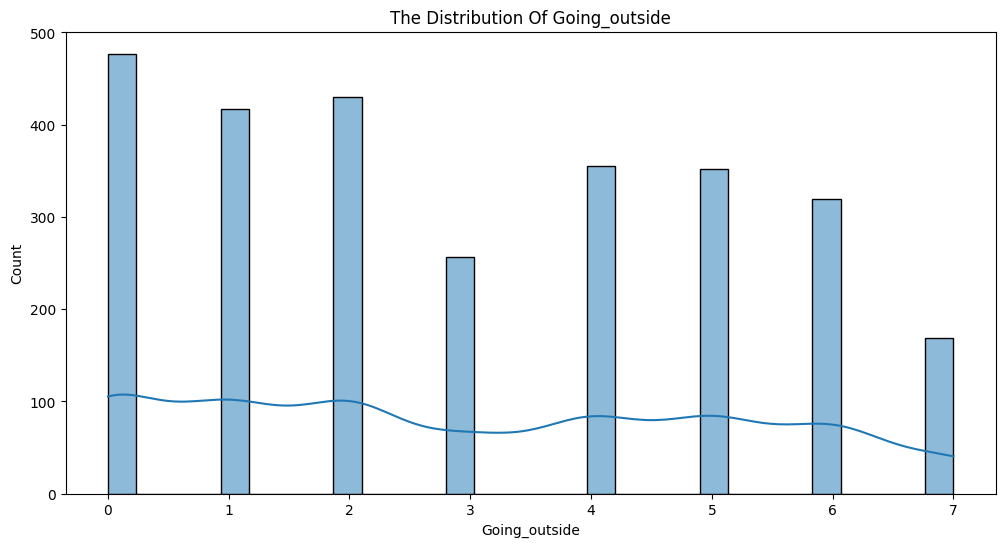

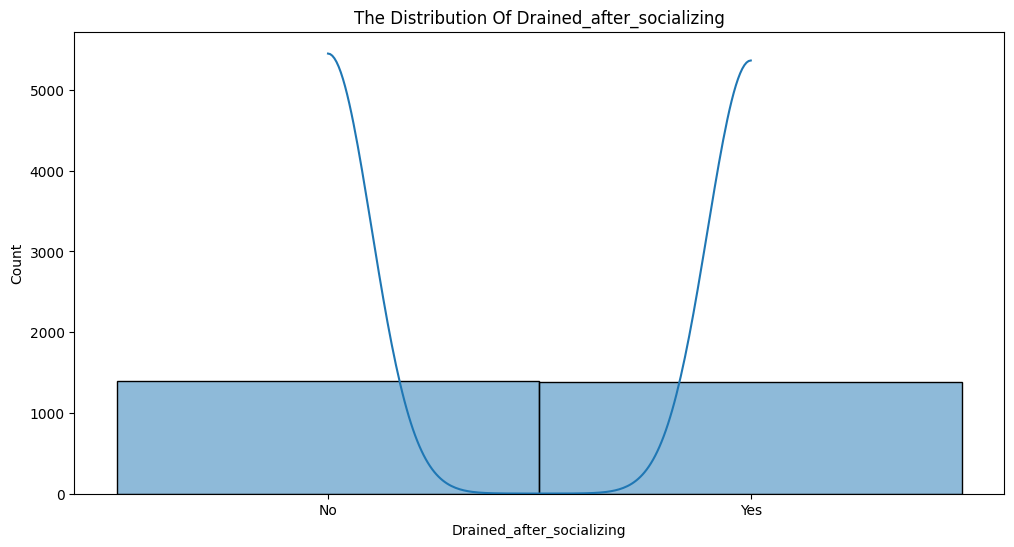

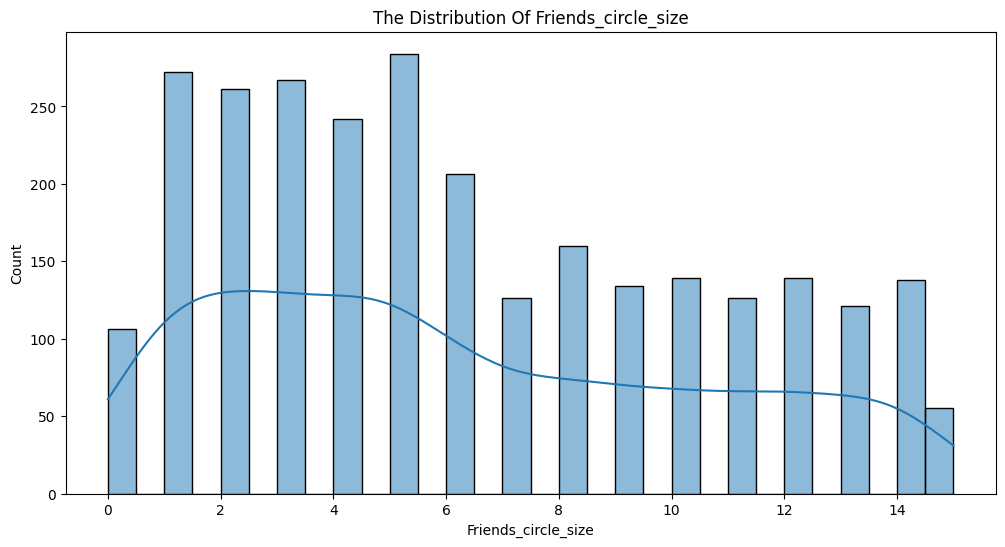

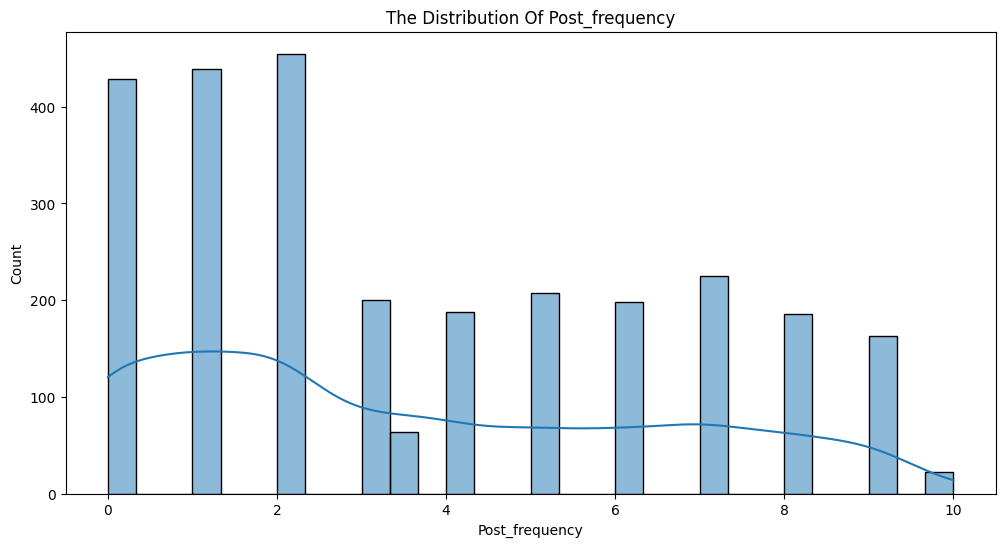

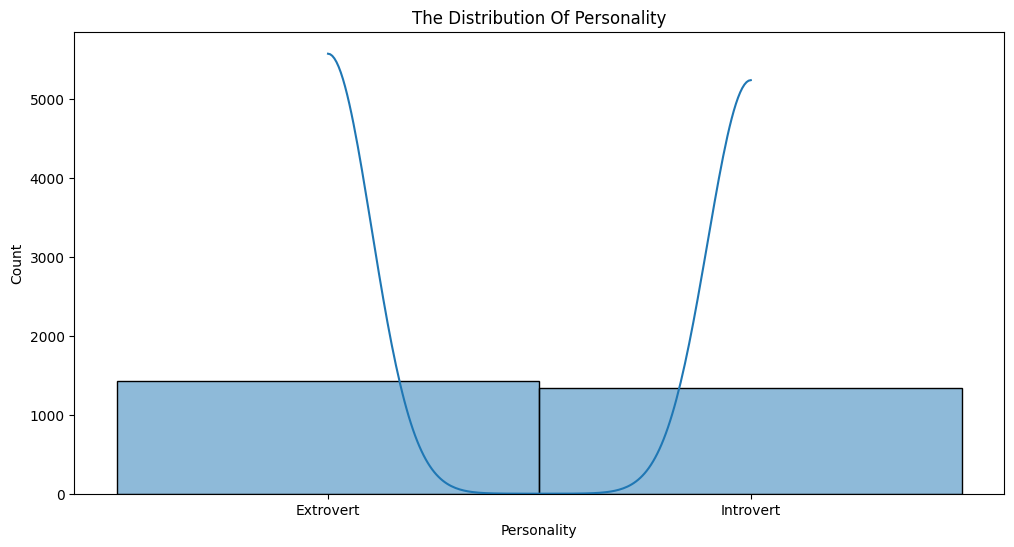

In [334]:
for cols in df:
    plt.figure(figsize=(12,6))
    sns.reset_defaults()
    sns.histplot(data=df,x=cols,kde=True,bins=30)
    plt.title(f"The Distribution Of {cols}")
    plt.show()

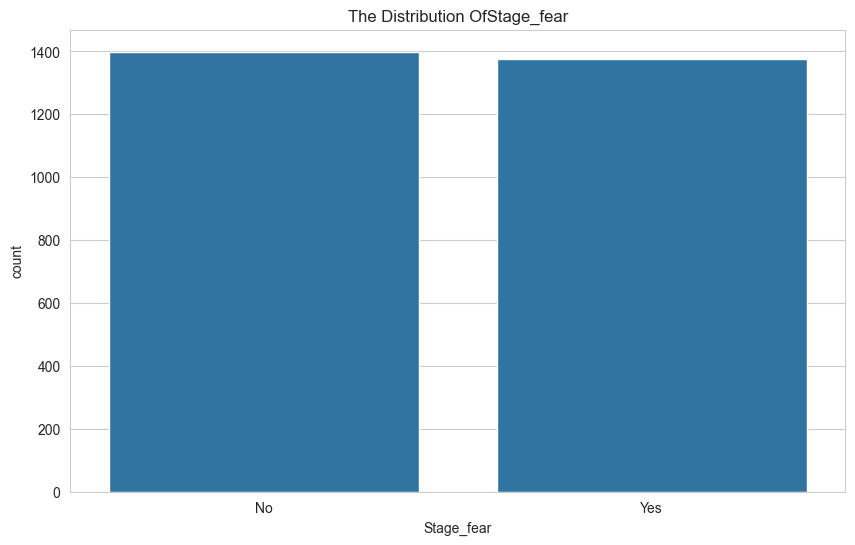

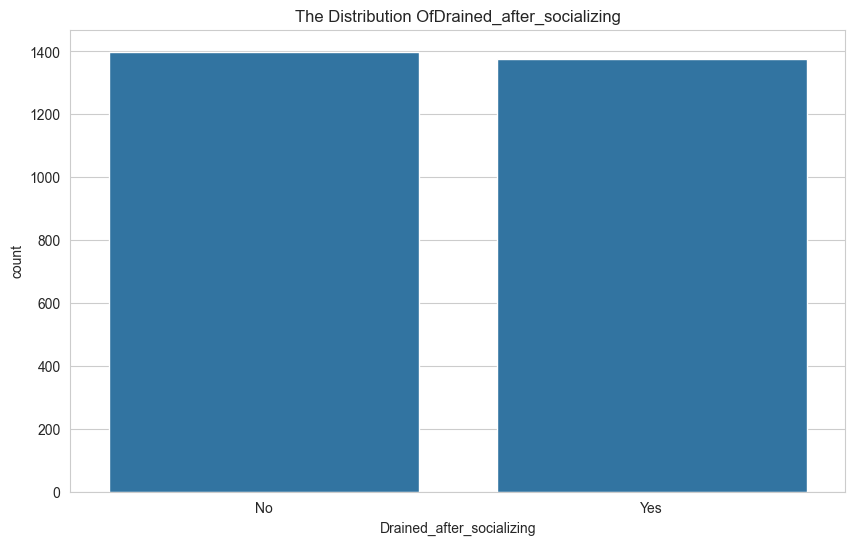

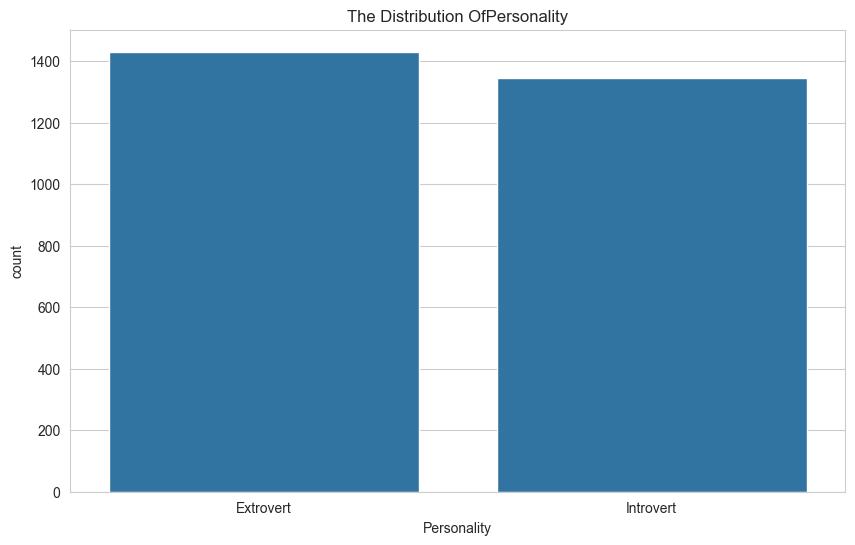

In [335]:
ob=df.select_dtypes(include="object")
for colss in ob:
    plt.figure(figsize=(10,6))
    sns.set_style("whitegrid")
    sns.countplot(data=df,x=colss)
    plt.title(f"The Distribution Of{colss}")
    plt.show()

In [336]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


## Machine Learning

In [337]:
label_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])  # Extrovert=0,Introvert=1,No=0,Yes=1

In [338]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [339]:
x=df.drop("Personality",axis=1)
y=df["Personality"]

In [340]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [341]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [342]:
y_pred=model.predict(x_test)
accuracy_score=accuracy_score(y_test,y_pred)
classification_report=classification_report(y_test,y_pred)
print(f"The Accuracy Score Is: {accuracy_score}\n"
      f"The Classification Report Is:\n{classification_report}")


The Accuracy Score Is: 0.9262589928057554
The Classification Report Is:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       284
           1       0.92      0.93      0.93       272

    accuracy                           0.93       556
   macro avg       0.93      0.93      0.93       556
weighted avg       0.93      0.93      0.93       556



## New Data Prediction

In [348]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [349]:
feature_names=[	"Time_spent_Alone",	"Stage_fear","Social_event_attendance","Going_outside","Drained_after_socializing","Friends_circle_size","Post_frequency"]
new_data=(10.0,1,0.0,0.0,0,0.0,1.0)
input_df=pd.DataFrame([new_data],columns=feature_names)
prediction=model.predict(input_df)
if (prediction[0]==0):
    print("The Person Is Extrovert")
else:
    print("The Person Is Introvert")

The Person Is Introvert


## 🔍 New Data Prediction: Real-World Personality Classification

Let's test our model on a **new sample profile** based on real-world behavioral traits.

### 🧑‍💼 Individual Profile:
| Feature                    | Value                  | Interpretation                                      |
|----------------------------|------------------------|------------------------------------------------------|
| **Time Spent Alone**       | High (almost always)   | Prefers solitude and independent time               |
| **Stage Fear**             | Yes                    | Likely uncomfortable in public-speaking situations  |
| **Social Event Attendance**| Occasional             | Avoids crowds but might attend selective events     |
| **Going Outside**          | Rarely                 | Limited outdoor engagement, prefers staying in      |
| **Drained After Socializing** | Yes                 | Social interactions lead to exhaustion              |
| **Friends Circle Size**    | None (0)               | Minimal to no close social circle                   |
| **Post Frequency**         | Almost Zero            | Does not engage in social media sharing             |

---

### 🤖 Model Prediction:
> 🧠 **Predicted Personality: `Introvert`**

✅ The model confidently classified this individual as an **Introvert**, which aligns well with psychological patterns and behavioral indicators present in the data.

---

### 📘 Interpretation:

Based on this behavioral profile:
- This individual exhibits **classic introvert characteristics** — needing solitude to recharge, avoiding overstimulating environments, and expressing low interest in social and digital interaction.
- The combination of **high alone time**, **social exhaustion**, and **lack of external engagement** makes it a **textbook introversion profile**.
- The prediction validates the model's ability to generalize beyond training data and provide **human-aligned personality insights**.

---

> 🧩 This use case highlights how machine learning can map real-world behavioral patterns into meaningful psychological traits, potentially aiding in personal development, mental health insights, and human resource planning.

